<a href="https://colab.research.google.com/github/asutoshp10/-Notes/blob/main/mood_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d rahmaezzat66/data-classification-happy-and-sad-face

100% 85.4M/85.4M [00:05<00:00, 21.5MB/s]
100% 85.4M/85.4M [00:05<00:00, 15.3MB/s]


In [3]:
import zipfile

In [4]:
zip_ref=zipfile.ZipFile('/content/data-classification-happy-and-sad-face.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,BatchNormalization,Dropout,Flatten

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
data_dir='/content/Happy & Sad'

In [7]:
for i in os.listdir(data_dir):
  for j in os.listdir(os.path.join('/content/Happy & Sad',f'{i}/{i}')):
    img_path=os.path.join(data_dir,i,i,j)
    try:
      tip=imghdr.what(img_path)
      if tip not in image_exts:
        print(f'the image {j} does not exist')
        os.remove(img_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

the image 537x840.jpg does not exist
the image Success-in-life-and-business.gif does not exist
the image 2560px-Happy_People.jpg does not exist
the image happiness_thumbnail.jpg does not exist
the image guilherme-stecanella-375176-unsplash.jpg does not exist
the image 220px-Happy_People_A_Year_in_the_Taiga_poster.jpg does not exist
the image Happy20People.jpg does not exist
the image depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg does not exist
the image 800px_COLOURBOX27149344.jpg does not exist
the image depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg does not exist
the image close-up-man-portrait-black-and-white-crying-tears-emotional-732x549-thumbnail-732x549.jpg does not exist
the image 63799429-sad-unhappy-crying-man-face-people-emotional-expressions.jpg does not exist
the image Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg does not exist
the image who_is_pictured_above_saying_For_me_crying_is_not_showing-m-40_1474381470216.jpg does not e

In [8]:
train=tf.keras.preprocessing.image_dataset_from_directory(
   directory=data_dir,
   validation_split=0.2,
   subset='training',
   seed=123
)

test=tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123
)

Found 495 files belonging to 2 classes.
Using 396 files for training.
Found 495 files belonging to 2 classes.
Using 99 files for validation.


In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train.map(process)
validation_ds = test.map(process)

In [10]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.1)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.1)))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.L2(0.1)))

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [19]:
history = model.fit(train_ds,epochs=40,validation_data=validation_ds,callbacks=callback)

Epoch 1/40
13/13 [==============================] - 5s 214ms/step - loss: 8.5729 - accuracy: 0.9242 - val_loss: 11.7569 - val_accuracy: 0.5758
Epoch 2/40
13/13 [==============================] - 6s 291ms/step - loss: 8.9246 - accuracy: 0.8737 - val_loss: 15.4397 - val_accuracy: 0.5758
Epoch 3/40
13/13 [==============================] - 5s 200ms/step - loss: 10.1506 - accuracy: 0.9116 - val_loss: 13.7060 - val_accuracy: 0.5758
Epoch 4/40
13/13 [==============================] - 6s 236ms/step - loss: 9.4901 - accuracy: 0.8737 - val_loss: 13.5677 - val_accuracy: 0.5758
Epoch 5/40
13/13 [==============================] - 5s 195ms/step - loss: 9.1614 - accuracy: 0.8838 - val_loss: 14.1725 - val_accuracy: 0.5758
Epoch 6/40
13/13 [==============================] - 5s 195ms/step - loss: 8.5732 - accuracy: 0.8788 - val_loss: 11.9700 - val_accuracy: 0.5758
Epoch 7/40
13/13 [==============================] - 6s 248ms/step - loss: 8.0607 - accuracy: 0.8838 - val_loss: 10.4120 - val_accuracy: 0.585

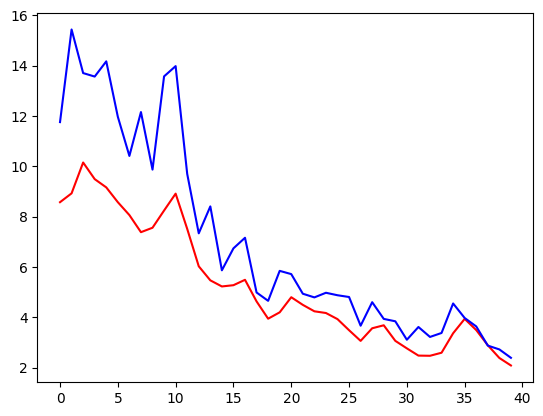

In [20]:
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.show()

In [ ]:
img='/content/Happy & Sad/Happy/Happy/-success-celebration-target-winning-bonus-achievements-happy-group-271948919.jpg'

1/1 [==============================] - 0s 393ms/step
[[1.]]


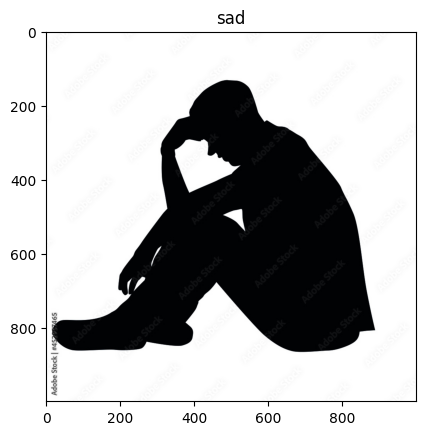

In [21]:
img_readable=cv2.imread('/content/Happy & Sad/Sad/Sad/1000_F_452957465_ZDlbGO5mwQ4LisGrusfhuFwYDG2by4lc.jpg')
real=cv2.cvtColor(img_readable,cv2.COLOR_BGR2RGB)
test_img=cv2.resize(real,(256,256))
test_input = test_img.reshape((1,256,256,3))
a=model.predict(test_input/255)
if a<=0.5:
  b='happy'
else:
  b='sad'
plt.imshow(real)
plt.title(label=b)
print(a)

In [22]:
model.save('mood_classifier')